<font size=7> Heatmap

# Setup

In [1]:
from human_hip import spike_data
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

In [2]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [4]:
fr = calculate_mean_firing_rates(sd)

(array([114.,  61.,  21.,   9.,   4.,   2.,   0.,   0.,   0.,   1.]),
 array([ 0.11663493,  3.59513294,  7.07363094, 10.55212894, 14.03062694,
        17.50912495, 20.98762295, 24.46612095, 27.94461896, 31.42311696,
        34.90161496]),
 <BarContainer object of 10 artists>)

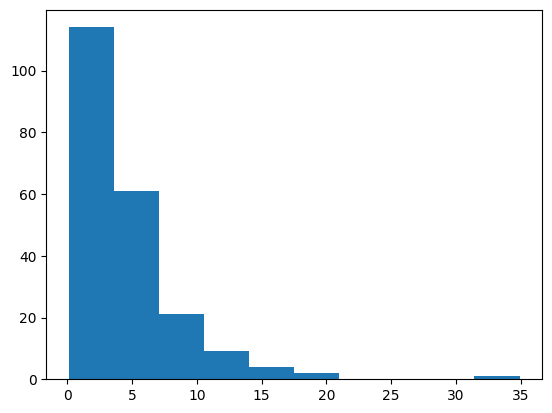

In [7]:
plt.hist( fr )

/tmp/ipykernel_2309/2708161964.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


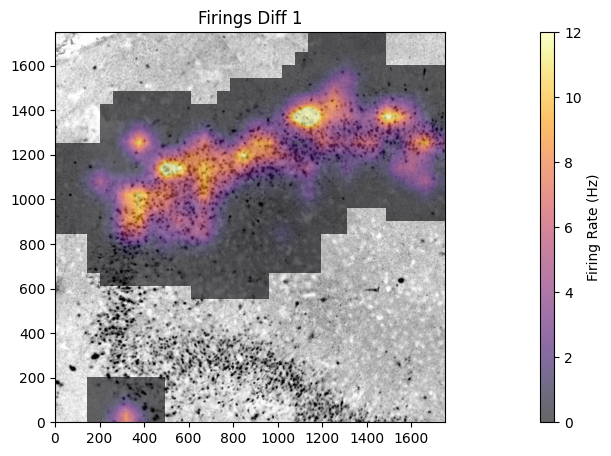

In [46]:
from matplotlib.colors import LinearSegmentedColormap
#cmap =   #LinearSegmentedColormap.from_list("my_cmap", ['white', 'red' ])

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter

img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823_bw.png")

neuron_x = []
neuron_y = []

for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

mean1 = np.mean(fr)
std1 = np.std(fr)


# Determine global min and max for the colorbar
# global_min = np.min(fr) #np.mean(fr)-2*np.std(fr) 
# global_max = np.max(fr) #np.mean(fr)+2*np.std(fr) 
global_min = np.mean(fr)-np.std(fr) 
global_max = np.mean(fr)+np.std(fr) 


# Normalize both datasets based on the global min and max
#norm = plt.Normalize( vmin= np.mean(fr)-np.std(fr), vmax= np.mean(fr)+np.std(fr) )
norm = plt.Normalize( vmin= 0, vmax= 12)
#plt.figure(figsize=(1, 6))

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])

plt.imshow(img, extent=[0, 3850, 0, 2100])
heatmap1, xedges1, yedges1 = np.histogram2d(neuron_x, neuron_y, bins=30, weights=fr, range=[[0, 1750], [0, 1750]])
heatmap1 = gaussian_filter(heatmap1, sigma=.65)
heatmap1 = np.ma.masked_where(heatmap1 == 0, heatmap1)
im1 = plt.imshow(heatmap1.T, extent=[0, 1750, 0, 1750], origin='lower', cmap="inferno", norm=norm, alpha=0.6, interpolation='bilinear')
plt.title('Firings Diff 1')

#cbar_ax = plt.subplot(gs[2])
#cbar = plt.colorbar(im2, cax=cbar_ax)
#cbar.set_label('Firing Differences')

cbar_ax = plt.subplot(gs[0, 2])  # Add the colorbar to the third column in the grid
cbar = plt.colorbar(im1, cax=cbar_ax)  # Create the colorbar based on the heatmap
cbar.set_label('Firing Rate (Hz)')

plt.tight_layout()
plt.show()